<a href="https://colab.research.google.com/github/AykanIpek/predict-total-savings/blob/main/Predicting_Potential_Savings_Total.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor # Boosting Logic
from sklearn.ensemble import RandomForestRegressor # Bagging Logic

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data Science Proje 1/data.csv')

In [ ]:
data.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076


In [ ]:
data.columns

Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent',
       'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
       'Entertainment', 'Utilities', 'Healthcare', 'Education',
       'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings',
       'Disposable_Income', 'Potential_Savings_Groceries',
       'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
       'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
       'Potential_Savings_Healthcare', 'Potential_Savings_Education',
       'Potential_Savings_Miscellaneous'],
      dtype='object')

"make potential total and drop relative data"

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  object 
 4   City_Tier                        20000 non-null  object 
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Utilities         

In [ ]:
data.isnull().sum()

,0
Income,0
Age,0
Dependents,0
Occupation,0
City_Tier,0
Rent,0
Loan_Repayment,0
Insurance,0
Groceries,0
Transport,0


In [ ]:
data["Total_Potential_Savings"] = 0
for column in data.columns:
  if column.startswith("Potential_Savings_"):
    data["Total_Potential_Savings"] += data[column]
    data.drop(column,axis=1,inplace=True)

In [ ]:
data.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,Utilities,Healthcare,Education,Miscellaneous,Desired_Savings_Percentage,Desired_Savings,Disposable_Income,Total_Potential_Savings
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,1651.801726,1536.184255,2911.792231,1546.914539,0.000000,831.525120,13.890948,6200.537192,11265.627707,3507.222841
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,649.378103,1050.241738,1626.143346,1137.351325,1551.723167,564.235007,7.160376,1923.176434,9676.818733,1482.618056
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,1513.814376,1723.306926,3368.457108,2178.515847,3160.026299,628.371220,13.997808,7050.360422,13891.450624,3551.316456
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,5040.249158,2858.194240,6128.550387,4571.118217,0.000000,2526.055712,16.455440,16694.965136,31617.953615,6078.520570
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,692.827225,660.186852,1092.689024,1169.095816,1445.215694,515.510300,7.533982,1874.099434,6265.700532,1511.357063


"List comprehension kullan"

In [ ]:
data.columns

Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent',
       'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
       'Entertainment', 'Utilities', 'Healthcare', 'Education',
       'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings',
       'Disposable_Income', 'Total_Potential_Savings'],
      dtype='object')

In [ ]:
data.describe()

,Income,Age,Dependents,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,Utilities,Healthcare,Education,Miscellaneous,Desired_Savings_Percentage,Desired_Savings,Disposable_Income,Total_Potential_Savings
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,4.158550e+04,41.031450,1.995950,9115.494629,2049.800292,1455.028761,5205.667493,2704.466685,1461.856982,1448.853658,2504.976953,1663.081794,2498.348422,830.553181,9.804183,4982.878416,10647.367257,2579.414013
std,4.001454e+04,13.578725,1.417616,9254.228188,4281.789941,1492.938435,5035.953689,2666.345648,1481.660811,1489.019270,2522.981880,1628.163024,3098.438166,845.019922,3.903858,7733.468188,11740.637289,2576.673919
min,1.301187e+03,18.000000,0.000000,235.365692,0.000000,30.002012,154.078240,81.228584,39.437523,45.421469,75.429414,53.500761,0.000000,20.503223,5.000042,0.000000,-5400.788673,68.118414
25%,1.760488e+04,29.000000,1.000000,3649.422246,0.000000,580.204749,2165.426419,1124.578012,581.011801,581.632906,1017.670366,684.364440,611.682170,323.626896,6.940423,1224.932636,3774.894323,1046.514956
50%,3.018538e+04,41.000000,2.000000,6402.751824,0.000000,1017.124681,3741.091535,1933.845509,1029.109726,1020.198376,1766.474869,1189.203827,1701.901075,579.078393,8.898622,2155.356763,7224.890977,1833.535113
75%,5.176545e+04,53.000000,3.000000,11263.940492,2627.142320,1787.160895,6470.892718,3360.597508,1807.075251,1790.104082,3103.723308,2057.082277,3311.705122,1025.195018,11.877171,6216.309609,13331.950716,3206.461310
max,1.079728e+06,64.000000,4.000000,215945.674703,123080.682009,38734.932935,119816.898124,81861.503457,34406.100166,38667.368308,53725.442255,36001.527365,81665.091857,15856.359401,24.998776,245504.485208,377060.218482,62801.156015


In [ ]:
data.Occupation.unique()

array(['Self_Employed', 'Retired', 'Student', 'Professional'],
      dtype=object)

In [ ]:
data.City_Tier.unique()

array(['Tier_1', 'Tier_2', 'Tier_3'], dtype=object)

In [ ]:
data.Education.nunique()

15940

In [ ]:
len(data)

20000

In [ ]:
print("min age: {}".format(data.Age.min()))
print("max age: {}".format(data.Age.max()))

min age: 18
max age: 64


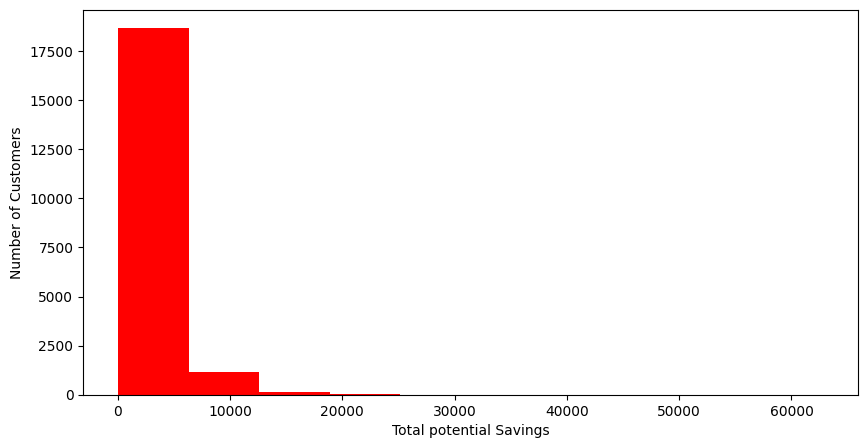

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(data["Total_Potential_Savings"],color="red")
plt.xlabel("Total potential Savings")
plt.ylabel("Number of Customers")
plt.show()

/tmp/ipython-input-1854397667.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x="Occupation",palette="coolwarm",edgecolor='black') #sns.countplot
/tmp/ipython-input-1854397667.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x="City_Tier",palette="bright",edgecolor='black',)  #sns.countplot


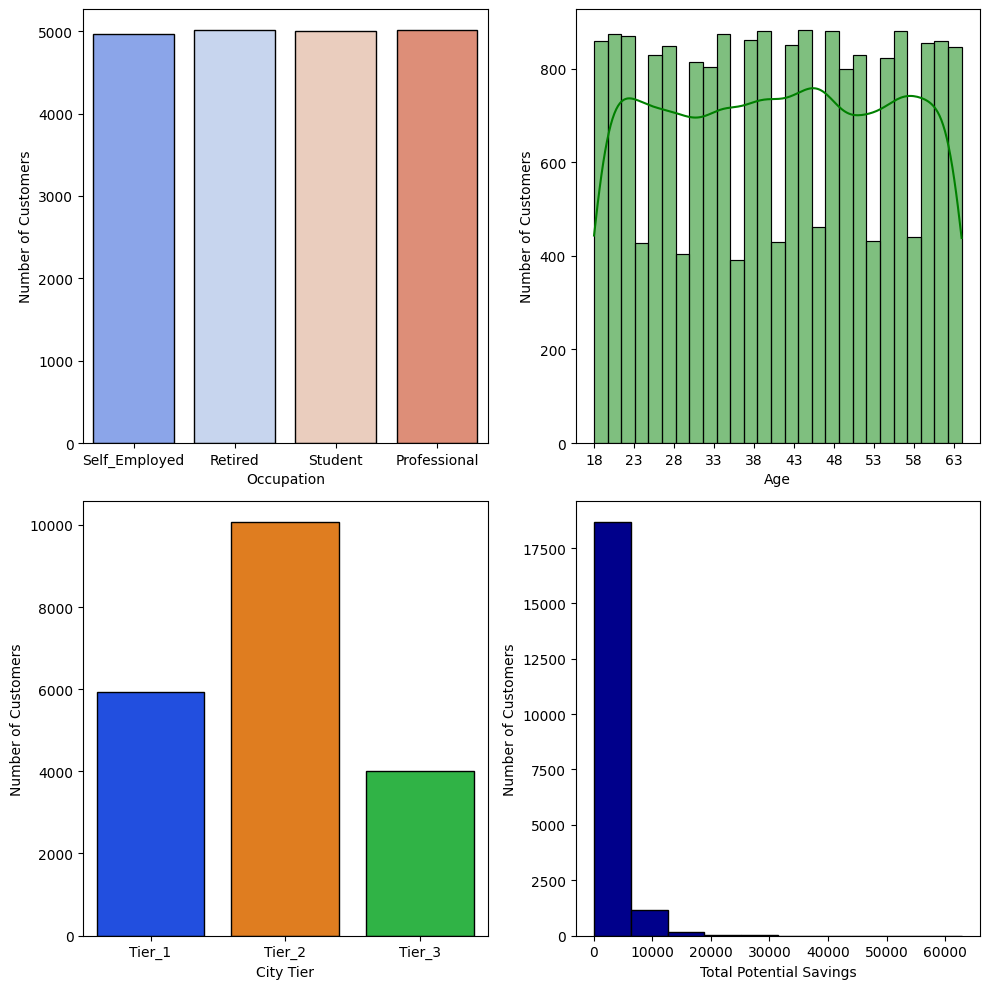

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(data=data,x="Occupation",palette="coolwarm",edgecolor='black') #sns.countplot
plt.xlabel("Occupation")
plt.ylabel("Number of Customers")

plt.subplot(2,2,2)
sns.histplot(data=data,x="Age",color="green",edgecolor='black',kde=True) #sns.histplot + kde
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.xticks(ticks=np.arange(18,64,5))

plt.subplot(2,2,3)
sns.countplot(data=data,x="City_Tier",palette="bright",edgecolor='black',)  #sns.countplot
plt.xlabel("City Tier")
plt.ylabel("Number of Customers")

plt.subplot(2,2,4)
plt.hist(data["Total_Potential_Savings"],color='darkblue',edgecolor='black') #plt.hist
plt.xlabel("Total Potential Savings")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

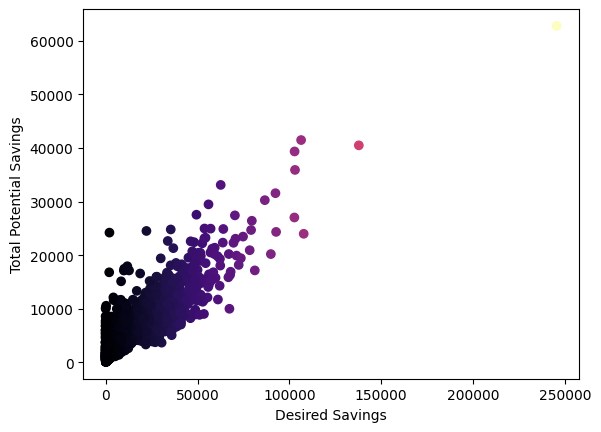

In [ ]:
plt.scatter(data=data,x="Desired_Savings",y="Total_Potential_Savings",c=data.Desired_Savings,cmap="magma")
plt.xlabel("Desired Savings")
plt.ylabel("Total Potential Savings")
plt.show()

/tmp/ipython-input-935982742.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x="Dependents",palette="plasma")


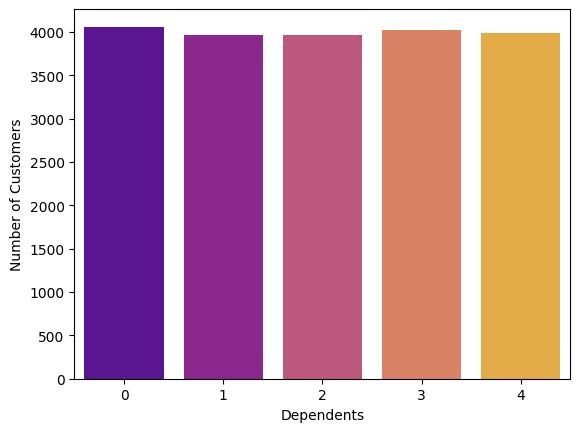

In [ ]:
sns.countplot(data=data,x="Dependents",palette="plasma")
plt.xlabel("Dependents")
plt.ylabel("Number of Customers")
plt.show()

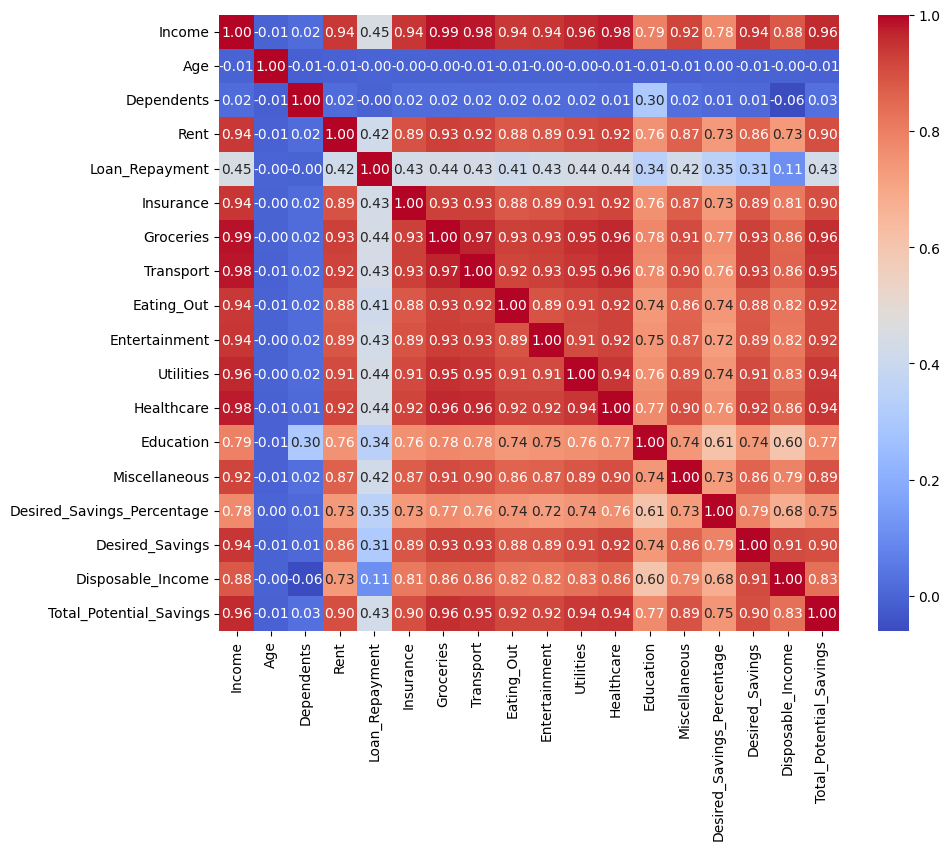

In [ ]:
corr = data.select_dtypes(np.number).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.show()

In [ ]:
x = data.drop(["Total_Potential_Savings"],axis=1)
y = data.Total_Potential_Savings

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

num_cols = [col for col in x_train.columns if x_train[col].dtypes!="O"]
cat_cols = [col for col in x_train.columns if x_train[col].dtypes=="O"]

In [ ]:
cat_cols

['Occupation', 'City_Tier']

In [ ]:
num_cols

['Income',
 'Age',
 'Dependents',
 'Rent',
 'Loan_Repayment',
 'Insurance',
 'Groceries',
 'Transport',
 'Eating_Out',
 'Entertainment',
 'Utilities',
 'Healthcare',
 'Education',
 'Miscellaneous',
 'Desired_Savings_Percentage',
 'Desired_Savings',
 'Disposable_Income']

In [ ]:
standardScaler = StandardScaler()
standardScaler.fit(x_train[num_cols])
x_train_num = standardScaler.transform(x_train[num_cols])
x_test_num = standardScaler.transform(x_test[num_cols])

In [ ]:
oneHotEnc = OneHotEncoder(handle_unknown="ignore",sparse_output=False)
oneHotEnc.fit(x_train[cat_cols])
x_train_cat = oneHotEnc.transform(x_train[cat_cols])
x_test_cat = oneHotEnc.transform(x_test[cat_cols])

In [ ]:
x_train = np.concatenate((x_train_cat,x_train_num),axis=1)
x_test = np.concatenate((x_test_cat,x_test_num),axis=1)

In [ ]:
def evaluate_model(y_test,y_pred,model_name):
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    print("Performance of {}".format(model_name))
    print("MAE:{}".format(mae))
    print("MSE:{}".format(mse))
    print("R2:{}".format(r2))

In [ ]:
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbosity=0
)
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)

evaluate_model(y_test,xgb_pred,"XGBRegressor")
print("------------------------------------------------")
evaluate_model(y_test,rf_pred,"RandomForestRegressor")

Performance of XGBRegressor
MAE:408.26935914399473
MSE:473425.97049234854
R2:0.9169457747266869
------------------------------------------------
Performance of RandomForestRegressor
MAE:402.5843622564602
MSE:444130.8366327803
R2:0.9220850885764407


In [ ]:
"""
param_grid = {
    'n_estimators' : [200,300,400],
    'max_depth': [20, 30, 40],
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=1),param_grid=param_grid,cv=5,scoring="r2")
grid_search.fit(x_train,y_train)
best_param = grid_search.best_params_
print(best_param)
"""

'\nparam_grid = {\n    \'n_estimators\' : [200,300,400],\n    \'max_depth\': [20, 30, 40],\n}\ngrid_search = GridSearchCV(RandomForestRegressor(random_state=1),param_grid=param_grid,cv=5,scoring="r2")\ngrid_search.fit(x_train,y_train)\nbest_param = grid_search.best_params_\nprint(best_param)\n'